# Diabetes prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [2]:
df=pd.read_csv('D:\Yash\projects\Diabetes Prediction - Copy\dataset\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 We can see there are few data columns Glucose,BloodPressure,SkinThickness,Inslin ,BMI which have 0 values. That is not possible. so we can either remove this data or replace with their respective mean values.

In [6]:
# Replaceing 0 values with their respective means
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

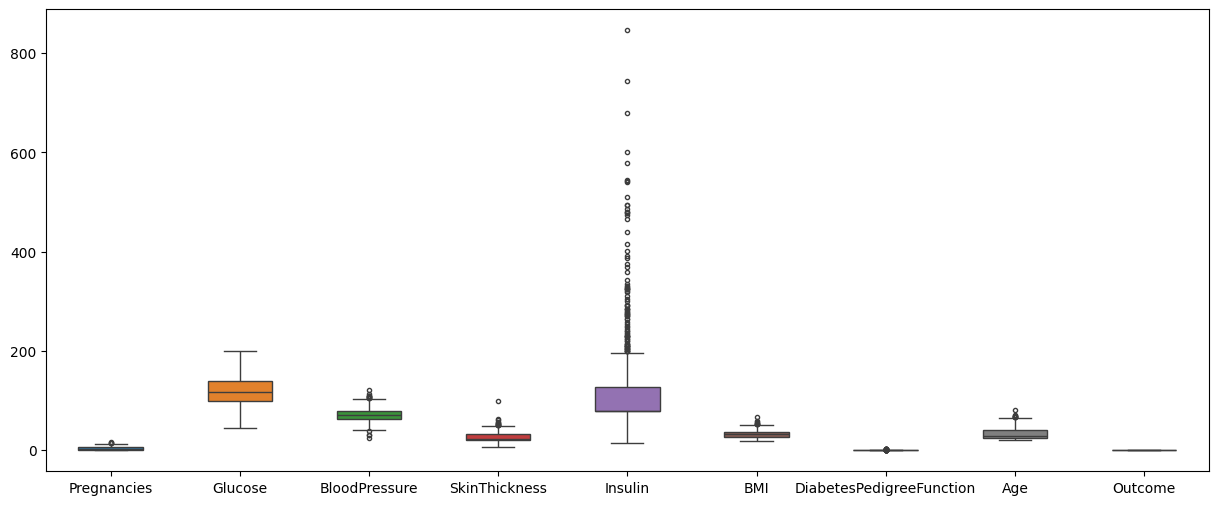

In [8]:
# There are some outliers in the dataset so we have to visualize it.
plt.figure(figsize=(15,6))
sns.boxplot(df,width=0.5,fliersize=3)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [10]:
#Segrate into Dependent and Independent Features
x=df.drop(columns=['Outcome'],axis=1)
y=df['Outcome']

In [11]:
# divide into train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.30)

In [12]:
x_train.shape,x_test.shape

((537, 8), (231, 8))

In [13]:
import pickle

# Standard Scaler scaling
def standard_scaler(x_train,x_test):
    #Scaling the data
    scaler=StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    #Saving the model

    file = open('D:\Yash\projects\Diabetes Prediction\Model/standardscaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return x_train_scaled,x_test_scaled

In [14]:
x_train_scaled,x_test_scaled = standard_scaler(x_train,x_test)

In [15]:
x_train_scaled

array([[-1.13311543,  0.93799948,  1.43692936, ...,  1.34233669,
        -0.3002719 , -1.05654479],
       [-0.8391623 , -1.29566732, -0.41000922, ..., -2.08218643,
         0.45699051, -0.55622332],
       [-0.54520916, -0.01459371, -0.24210571, ...,  0.58292361,
        -0.39305899, -0.55622332],
       ...,
       [ 0.0426971 , -0.93433887, -0.66186448, ..., -1.15083077,
        -0.96774035, -1.05654479],
       [ 2.10036903, -1.22997124,  0.0937013 , ..., -0.37708914,
        -0.51278428,  0.11087198],
       [ 0.33665024,  0.44527886,  0.76531533, ..., -0.10591017,
         0.50488062,  2.94602702]])

## Decision Tree Classifier


In [16]:
## Decision TreeModel training with hyperparameter tuning

import warnings
warnings.filterwarnings('ignore')


In [17]:
parameters={
          'criterion':['gini','entropy','log_loss'],
          'splitter':['best','random'],
          'max_depth':[1,2,3,4,5],
          'max_features':['auto','sqrt','log2'] 
}

In [18]:
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()

In [19]:
clf=GridSearchCV(classifier,param_grid=parameters,cv=5,scoring='accuracy',verbose=3)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score

[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.704 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.759 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.794 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.682 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.692 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.667 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.648 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.664 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.579 total time=   0.0s
[CV 5/5] END criteri

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [20]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [21]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='log2',splitter='best')

In [22]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2')

Lets see how our model perform on test dataset

In [23]:
y_pred=classifier.predict(x_test_scaled)


In [24]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[157,   0],
       [ 74,   0]], dtype=int64)

In [25]:

true_positive  = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative  = conf_mat[1][1]

In [26]:
accuracy = (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative)
accuracy

0.6796536796536796

In [27]:
precision = true_positive/(true_positive + false_positive)
precision

1.0

In [28]:
recall = true_positive/(true_positive + false_negative)
recall

0.6796536796536796

In [29]:
f1_score = 2*(recall * precision)/ (recall + precision)
f1_score

0.8092783505154639

In [30]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.6796536796536796
[[157   0]
 [ 74   0]]
0.0


## Support vector Classifier

In [31]:
## Support vector classifier wi9th hyperparameter Tuning
param={
      'C':[0.1, 1, 10, 100, 1000],
      'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
      'kernel':['linear','polynomial','rbf']
}

In [32]:
svc=GridSearchCV(SVC(),param_grid=param,refit=True,cv=3,scoring='accuracy',verbose=3)
svc.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.804 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.743 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.804 total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.737 total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear

[CV 1/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.637 total time=   0.0s
[CV 1/3] END ..C=1, gamma=0.0001, kernel=linear;, score=0.810 total time=   0.0s
[CV 2/3] END ..C=1, gamma=0.0001, kernel=linear;, score=0.737 total time=   0.0s
[CV 3/3] END ..C=1, gamma=0.0001, kernel=linear;, score=0.732 total time=   0.0s
[CV 1/3] END C=1, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END C=1, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END C=1, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.642 total time=   0.0s
[CV 1/3] END ......C=10, gam

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'polynomial', 'rbf']},
             scoring='accuracy', verbose=3)

In [33]:
svc.best_score_

0.7616387337057727

In [34]:
svc.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [35]:
svc=SVC(C=1000,gamma=0.01,kernel='rbf')

Lets see how our model perform on test dataset

In [36]:
svc.fit(x_train_scaled,y_train)

SVC(C=1000, gamma=0.01)

In [37]:
y_pred=svc.predict(x_test_scaled)

In [38]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[137,  20],
       [ 39,  35]], dtype=int64)

In [39]:
true_positive  = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative  = conf_mat[1][1]

In [40]:
accuracy = (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative)
accuracy

0.7445887445887446

In [41]:
precision = true_positive/(true_positive + false_positive)
precision

0.8726114649681529

In [42]:
recall = true_positive/(true_positive + false_negative)
recall

0.7784090909090909

In [43]:
f1_score = 2*(recall * precision)/ (recall + precision)
f1_score

0.8228228228228229

In [44]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.7445887445887446
[[137  20]
 [ 39  35]]
0.5426356589147288


In [45]:
import pickle
file = open('D:\Yash\projects\Diabetes Prediction\Model\Modelforprediction.pkl','wb')
pickle.dump(classifier,file)
file.close()

### Naive bayes


In [46]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [47]:
param_nb={'var_smoothing':np.logspace(0,-9,num=100)}

In [48]:
gauss=GridSearchCV(gnb,param_grid=param_nb,cv=5,verbose=True,scoring='accuracy')

In [49]:
gauss.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=True)

In [50]:
gauss.best_params_

{'var_smoothing': 0.3511191734215131}

In [51]:
guass=GaussianNB(var_smoothing=  0.3511191734215131)
guass.fit(x_train_scaled,y_train)

GaussianNB(var_smoothing=0.3511191734215131)

In [52]:
y_pred=guass.predict(x_test_scaled)

In [53]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.7619047619047619
[[143  14]
 [ 41  33]]
0.5454545454545454
